# Assignment 4: Happiness Index

---
### Research Question: Which factors when changed can lead to more significant increase in general happiness?

* Region: Global
* Domain: Welfare/Happiness

Datasets are found here:
* 2018 World Happiness data: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2018.csv
* 2019 World Happiness data: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load datasets
index_2018 = pd.read_csv('2018_index.csv')
index_2019 = pd.read_csv('2019_index.csv')

In [3]:
index_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [4]:
index_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [5]:
print("2018 data:", index_2018.shape)
print("2019 data:", index_2019.shape)
print("How many null values in 2018 data?: ", index_2018.isnull().any(axis=1).sum())
print("How many null values in 2019 data?: ", index_2019.isnull().any(axis=1).sum())
print("How many duplicate data in 2018?: ", index_2018.duplicated().sum())
print("How many duplicate data in 2019?: ", index_2019.duplicated().sum())

2018 data: (156, 9)
2019 data: (156, 9)
How many null values in 2018 data?:  1
How many null values in 2019 data?:  0
How many duplicate data in 2018?:  0
How many duplicate data in 2019?:  0


Let's check out the null values in 2018 dataset.

In [6]:
null_2018 = index_2018[index_2018.isnull().any(axis=1)]
null_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


We shall remove UAE from our 2019 data analysis since we cannot do a fair comparison of how all variables changed from 2018-2019.

In [7]:
# drop UAE from 2018 and 2019
index_2018 = index_2018.loc[index_2018['Country or region'] != 'United Arab Emirates']
index_2019 = index_2019.loc[index_2019['Country or region'] != 'United Arab Emirates']

# check that there are no duplicates/null data in 2018 and 2019 datasets
print("2018 data:", index_2018.shape)
print("2019 data:", index_2019.shape)
print("How many null values in 2018 data?: ", index_2018.isnull().any(axis=1).sum())
print("How many null values in 2019 data?: ", index_2019.isnull().any(axis=1).sum())
print("How many duplicate data in 2018?: ", index_2018.duplicated().sum())
print("How many duplicate data in 2019?: ", index_2019.duplicated().sum())

2018 data: (155, 9)
2019 data: (155, 9)
How many null values in 2018 data?:  0
How many null values in 2019 data?:  0
How many duplicate data in 2018?:  0
How many duplicate data in 2019?:  0


In [8]:
# renaming columns in both datasets
index_2018 = index_2018.rename(columns = {'Country or region': 'Country', 'GDP per capita': 'GDP_pc', 
                                          'Healthy life expectancy': 'Life expectancy', 
                                          'Freedom to make life choices':'Freedom',
                                          'Perceptions of corruption': 'Corruption perception'})

index_2019 = index_2019.rename(columns = {'Country or region': 'Country', 'GDP per capita': 'GDP_pc', 
                                          'Healthy life expectancy': 'Life expectancy', 
                                          'Freedom to make life choices':'Freedom',
                                          'Perceptions of corruption': 'Corruption perception'})

print("2018 data:", index_2018.columns)
print("\n2019 data:", index_2019.columns)

2018 data: Index(['Overall rank', 'Country', 'Score', 'GDP_pc', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity', 'Corruption perception'],
      dtype='object')

2019 data: Index(['Overall rank', 'Country', 'Score', 'GDP_pc', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity', 'Corruption perception'],
      dtype='object')


#### Creating merged dataframe based on countries found in both dataframes

In [9]:
merged_df = pd.merge(index_2018, index_2019, on='Country', how='outer', indicator=True, suffixes=('_2018', '_2019'))
merged_df

,Overall rank_2018,Country,Score_2018,GDP_pc_2018,Social support_2018,Life expectancy_2018,Freedom_2018,Generosity_2018,Corruption perception_2018,Overall rank_2019,Score_2019,GDP_pc_2019,Social support_2019,Life expectancy_2019,Freedom_2019,Generosity_2019,Corruption perception_2019,_merge
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,1.0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,both
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341,both
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410,both
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118,both
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,156.0,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,145.0,3.775,0.046,0.447,0.380,0.220,0.176,0.180,both
155,NaN,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,5.274,0.983,1.294,0.838,0.345,0.185,0.034,right_only
156,NaN,Gambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,4.516,0.308,0.939,0.428,0.382,0.269,0.167,right_only
157,NaN,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,4.212,0.811,1.149,0.000,0.313,0.074,0.135,right_only


We can see some countries that are not found in both 2018 and 2019 datasets, we will remove these countries from our merged dataframe.

In [10]:
merged_df = merged_df[merged_df['_merge'] == 'both']
merged_df

,Overall rank_2018,Country,Score_2018,GDP_pc_2018,Social support_2018,Life expectancy_2018,Freedom_2018,Generosity_2018,Corruption perception_2018,Overall rank_2019,Score_2019,GDP_pc_2019,Social support_2019,Life expectancy_2019,Freedom_2019,Generosity_2019,Corruption perception_2019,_merge
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,1.0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,both
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341,both
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410,both
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118,both
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152.0,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,151.0,3.380,0.287,1.163,0.463,0.143,0.108,0.077,both
151,153.0,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,153.0,3.231,0.476,0.885,0.499,0.417,0.276,0.147,both
152,154.0,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,156.0,2.853,0.306,0.575,0.295,0.010,0.202,0.091,both
153,155.0,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,155.0,3.083,0.026,0.000,0.105,0.225,0.235,0.035,both


Now our dataframe rows have decreased. Let us check again for any duplicates or null values.

In [12]:
# check for any duplicates
print("How many duplicate data?: ", merged_df.duplicated().sum())

# check for any null values
print("How many null values?: ", merged_df.isnull().any(axis=1).sum())

How many duplicate data?:  0
How many null values?:  0


In [13]:
# we do not need the last column for further analysis
merged_df = merged_df.drop('_merge', axis=1)
merged_df.columns

Index(['Overall rank_2018', 'Country', 'Score_2018', 'GDP_pc_2018',
       'Social support_2018', 'Life expectancy_2018', 'Freedom_2018',
       'Generosity_2018', 'Corruption perception_2018', 'Overall rank_2019',
       'Score_2019', 'GDP_pc_2019', 'Social support_2019',
       'Life expectancy_2019', 'Freedom_2019', 'Generosity_2019',
       'Corruption perception_2019'],
      dtype='object')

In [14]:
merged_df.dtypes

Overall rank_2018             float64
Country                        object
Score_2018                    float64
GDP_pc_2018                   float64
Social support_2018           float64
Life expectancy_2018          float64
Freedom_2018                  float64
Generosity_2018               float64
Corruption perception_2018    float64
Overall rank_2019             float64
Score_2019                    float64
GDP_pc_2019                   float64
Social support_2019           float64
Life expectancy_2019          float64
Freedom_2019                  float64
Generosity_2019               float64
Corruption perception_2019    float64
dtype: object

### Feature Engineering to Answer Qn

Let's create another dataframe that consists of all the changes in scores for the indicators as well as the final happiness score. The values in these columns can be negative/positive. 

Since we only need to compare the change in happiness score, overall ranks is unnecessary. So we can drop the `Overall rank_2018` and `Overall rank_2019` columns.

In [15]:
# Select the desired columns from the merged DataFrame
selected_columns = ['Country', 'Score_2018', 'Score_2019', 'GDP_pc_2018', 'GDP_pc_2019',
                    'Social support_2018', 'Social support_2019', 'Life expectancy_2018', 'Life expectancy_2019',
                    'Freedom_2018', 'Freedom_2019', 'Generosity_2018', 'Generosity_2019',
                    'Corruption perception_2018', 'Corruption perception_2019']

# Create the new DataFrame with the selected columns
changes_df = merged_df[selected_columns].copy()

# Calculate the changes in scores for the indicators
changes_df['Score_change'] = changes_df['Score_2019'] - changes_df['Score_2018']
changes_df['GDP_pc_change'] = changes_df['GDP_pc_2019'] - changes_df['GDP_pc_2018']
changes_df['Social support_change'] = changes_df['Social support_2019'] - changes_df['Social support_2018']
changes_df['Life expectancy_change'] = changes_df['Life expectancy_2019'] - changes_df['Life expectancy_2018']
changes_df['Freedom_change'] = changes_df['Freedom_2019'] - changes_df['Freedom_2018']
changes_df['Generosity_change'] = changes_df['Generosity_2019'] - changes_df['Generosity_2018']
changes_df['Corruption perception_change'] = changes_df['Corruption perception_2019'] - changes_df['Corruption perception_2018']

# Drop the unnecessary columns
changes_df.drop(['Score_2018', 'Score_2019', 'GDP_pc_2018', 'GDP_pc_2019',
                 'Social support_2018', 'Social support_2019', 'Life expectancy_2018', 'Life expectancy_2019',
                 'Freedom_2018', 'Freedom_2019', 'Generosity_2018', 'Generosity_2019',
                 'Corruption perception_2018', 'Corruption perception_2019'], axis=1, inplace=True)

changes_df

,Country,Score_change,GDP_pc_change,Social support_change,Life expectancy_change,Freedom_change,Generosity_change,Corruption perception_change
0,Finland,0.137,0.035,-0.005,0.112,-0.085,-0.049,0.000
1,Norway,-0.040,0.032,0.000,0.167,-0.083,-0.015,0.001
2,Denmark,0.045,0.032,-0.017,0.128,-0.091,-0.032,0.002
3,Iceland,-0.001,0.037,-0.020,0.112,-0.086,0.001,-0.020
4,Switzerland,-0.007,0.032,-0.023,0.125,-0.088,0.007,-0.014
...,...,...,...,...,...,...,...,...
150,Yemen,0.025,-0.155,0.090,0.120,-0.101,0.025,0.013
151,Tanzania,-0.072,0.021,-0.106,0.118,-0.064,0.006,0.050
152,South Sudan,-0.401,-0.031,-0.033,0.118,-0.102,-0.022,-0.015
153,Central African Republic,0.000,0.002,0.000,0.095,-0.080,0.017,-0.003


Get a dataframe that compiles all the countries which have a **positive happiness score change**.

In [17]:
change_incr_df = changes_df[changes_df['Score_change'] > 0]
change_incr_df = change_incr_df.rename(columns={'Score_change': 'Score_increase'})
change_incr_df

,Country,Score_increase,GDP_pc_change,Social support_change,Life expectancy_change,Freedom_change,Generosity_change,Corruption perception_change
0,Finland,0.137,0.035,-0.005,0.112,-0.085,-0.049,0.000
2,Denmark,0.045,0.032,-0.017,0.128,-0.091,-0.032,0.002
5,Netherlands,0.047,0.035,0.034,0.121,-0.081,-0.011,0.003
8,Sweden,0.029,0.032,-0.014,0.096,-0.085,-0.018,-0.010
11,Austria,0.107,0.035,-0.029,0.125,-0.085,0.002,0.002
...,...,...,...,...,...,...,...,...
141,Madagascar,0.159,0.012,0.008,0.153,-0.073,0.014,-0.008
146,Haiti,0.015,0.008,-0.026,0.160,0.001,0.027,0.006
147,Liberia,0.480,-0.003,0.064,0.176,-0.049,0.027,0.003
150,Yemen,0.025,-0.155,0.090,0.120,-0.101,0.025,0.013


There are 87 countries with an increase in happiness score.

### Correlation Analysis
Let's visualise the correlation between changes in indicators and the score increase through a correlation matrix.

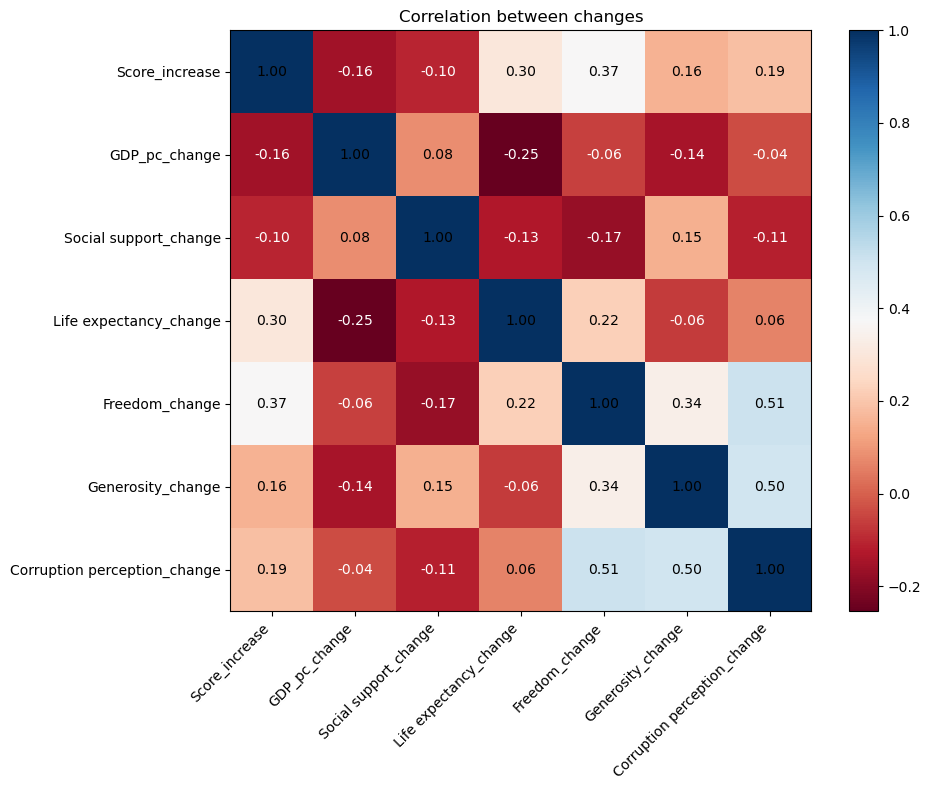

In [18]:
# Calculate the correlation matrix
correlation_matrix = change_incr_df.corr()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap plot
im = ax.imshow(correlation_matrix, cmap='RdBu')

# Add the correlation values as text annotations
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha='center', va='center', color='white' if correlation_matrix.iloc[i, j] < 0 else 'black')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and tick labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a title
ax.set_title("Correlation between changes")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Correlation Matrix observations:
- **Score increase is mostly influenced by changes to the level of freedom and healthy life expectancy.**
- **Score increase is negatively correlated with changes to the GDP pc and social support.**

---
To verify this correlation, let's take the **top 20 countries with the highest happiness score increase** and plot a parallel coordinates plot.

In [19]:
top20_scores = change_incr_df.nlargest(20, 'Score_increase').copy()
top20_scores

,Country,Score_increase,GDP_pc_change,Social support_change,Life expectancy_change,Freedom_change,Generosity_change,Corruption perception_change
154,Burundi,0.870,-0.045,-0.180,0.235,0.155,0.027,0.104
134,Benin,0.742,0.015,0.065,0.157,-0.091,0.012,0.015
138,Guinea,0.570,0.036,0.037,0.164,-0.062,0.022,-0.008
147,Liberia,0.480,-0.003,0.064,0.176,-0.049,0.027,0.003
132,Niger,0.462,0.007,-0.093,0.145,-0.072,0.013,0.003
64,Kosovo,0.438,0.027,0.002,0.180,0.041,-0.012,-0.017
70,Honduras,0.356,0.022,0.031,0.206,0.048,0.049,0.004
106,Ghana,0.339,0.019,-0.028,0.149,-0.118,0.033,0.011
18,Israel,0.325,-0.025,-0.104,0.146,-0.162,-0.093,-0.190
59,Cyprus,0.284,0.034,0.032,0.133,-0.017,-0.012,0.006


In [20]:
# remove the Score increase column since we already have top 20 countries in order
pcplot = top20_scores.drop(columns =['Score_increase'], axis=1)
pcplot

,Country,GDP_pc_change,Social support_change,Life expectancy_change,Freedom_change,Generosity_change,Corruption perception_change
154,Burundi,-0.045,-0.180,0.235,0.155,0.027,0.104
134,Benin,0.015,0.065,0.157,-0.091,0.012,0.015
138,Guinea,0.036,0.037,0.164,-0.062,0.022,-0.008
147,Liberia,-0.003,0.064,0.176,-0.049,0.027,0.003
132,Niger,0.007,-0.093,0.145,-0.072,0.013,0.003
64,Kosovo,0.027,0.002,0.180,0.041,-0.012,-0.017
70,Honduras,0.022,0.031,0.206,0.048,0.049,0.004
106,Ghana,0.019,-0.028,0.149,-0.118,0.033,0.011
18,Israel,-0.025,-0.104,0.146,-0.162,-0.093,-0.190
59,Cyprus,0.034,0.032,0.133,-0.017,-0.012,0.006


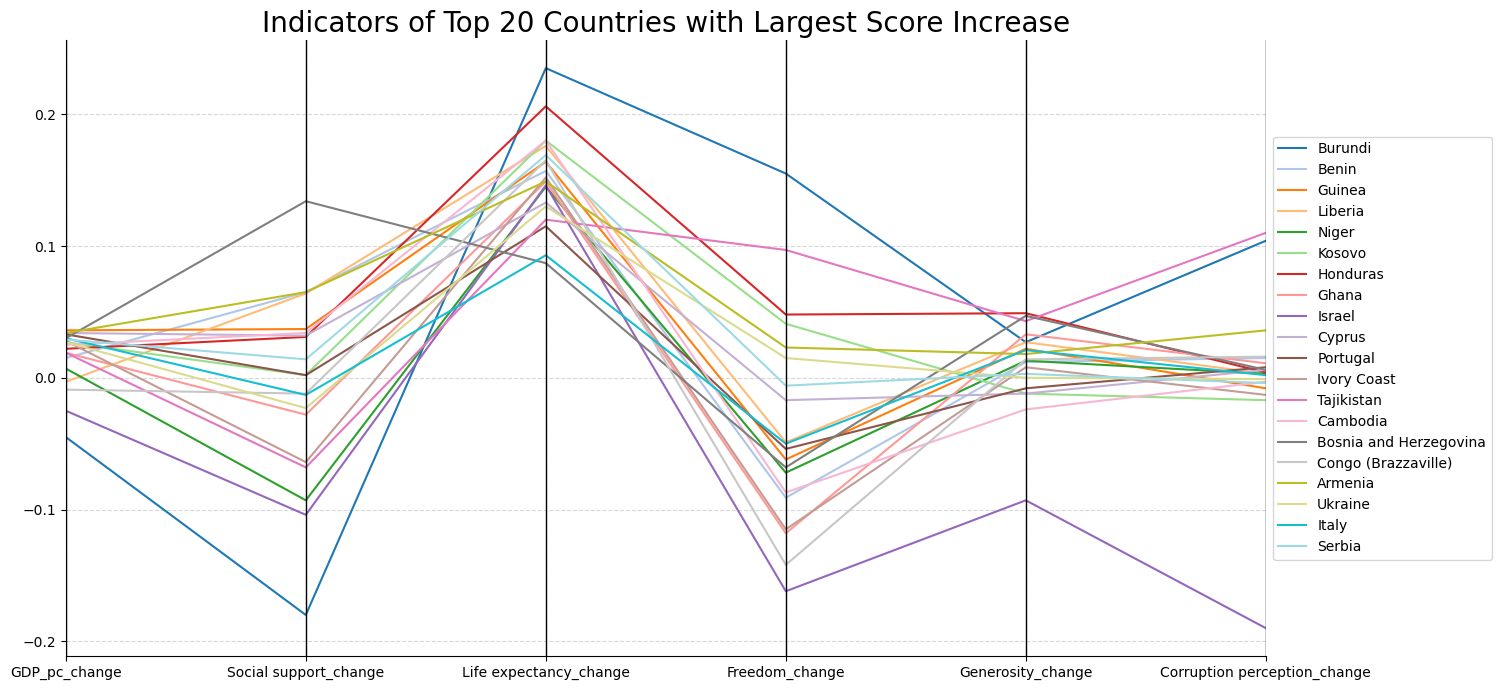

In [25]:
# Increase the figure size and adjust the layout
fig, ax = plt.subplots(figsize=(16, 8))
plt.subplots_adjust(left=0.1, right=0.85)

# Create a parallel coordinates plot using pandas' parallel_coordinates function
pd.plotting.parallel_coordinates(pcplot, 'Country', colormap='tab20', ax=ax)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the title and axis labels
plt.title('Indicators of Top 20 Countries with Largest Score Increase', fontsize=20)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Remove the spines on the top and right
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Conclusion of findings from the parallel coordinate plot
Firstly, Benin, which exhibits the largest score increase, stands out among the other countries in terms of the changes in healthy life expectancy and freedom indicators. The line representing Benin consistently shows the highest values for these indicators, indicating that improvements in healthy life expectancy and freedom have a more significant influence on the increase in general happiness. 

Furthermore, the trajectory of the line representing Benin converges towards the the trajectories of other countries' lines (most different from other countries) after passing through the indicator of freedom, implying that freedom to make own life choices is the most significant in increasing general happiness.

These findings suggest that prioritizing efforts to enhance health outcomes and foster individual freedom can have a substantial positive impact on overall happiness levels.